# Linear Regrssion Model to Predict Service Times 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder


In [ ]:
# !pip install rfpimp

In [ ]:
rgg_rss = pd.read_excel('RGG_RSS_final.xlsx')
Neighborhood=rgg_rss['Neighborhood'].unique()

In [ ]:
for n in Neighborhood:
    try:

        data=rgg_rss.loc[(rgg_rss['Neighborhood']==n) &(rgg_rss['Outlier']==0)]
        train_df = data[['Commodity', '16 gal', '20 gal','32 gal', '64 gal', '96 gal',
                '#Units','Day', 'Company', 'Truck', 'Neighborhood','Has Key']]
        dum_df = pd.get_dummies(train_df,columns=['Commodity', 'Company','Day', 'Neighborhood','Truck','Has Key'])
        X = dum_df
        y = data['Time']
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)
        pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LinearRegression())]) 
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_validation)
        mse = mean_squared_error(y_validation, y_pred)

        print(f"mean squared error: {mse:,.2f} for {n}, Accuracy {100*pipe.score(X_validation, y_validation):.0f}%")
    except:
        data=rgg_rss.loc[rgg_rss['Neighborhood']==n]
        print(n,len(data))

    


    


mean squared error: 984.90 for Inner Richmond, Accuracy 45%
mean squared error: 1,235.39 for Outer Richmond, Accuracy 41%
mean squared error: 1,130.84 for Excelsior, Accuracy 67%
mean squared error: 333.09 for Presidio Heights, Accuracy 82%
mean squared error: 177.21 for Ocean View, Accuracy 79%
mean squared error: 80.41 for West Twin Peaks, Accuracy 46%
mean squared error: 307.91 for Bernal Heights, Accuracy 43%
mean squared error: 1,784.51 for Western Addition, Accuracy 47%
mean squared error: 335.56 for Lakeshore, Accuracy 76%
mean squared error: 2,832.69 for Haight Ashbury, Accuracy 29%
mean squared error: 194.30 for Visitation Valley, Accuracy 69%
mean squared error: 21.71 for Inner Sunset, Accuracy 92%
mean squared error: 222.46 for Potrero Hill, Accuracy 77%
mean squared error: 95.63 for Mission, Accuracy 79%
mean squared error: 285.73 for Noe Valley, Accuracy 63%
mean squared error: 247.23 for Outer Sunset, Accuracy 58%
mean squared error: 213.53 for Parkside, Accuracy 12%
mean

In [ ]:
rgg_rss.loc[rgg_rss['Time']<15]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Meandor,Route,...,Day,#Units,Time,Company,Outlier,Truck,Neighborhood,Address_Street,Code,Has Key
1198,Garbage,na,C,1,0,0,0,0,NaN,30,...,2,1,12.0,RSS,0,NaN,Lakeshore,NaN,NaN,False
2781,Recycle,na,C,0,0,1,0,0,NaN,907,...,3,1,14.0,RSS,0,SL,Parkside,NaN,NaN,False
5376,Garbage/Recycle,S-HEIL,C,1,0,0,1,0,No,243,...,3,2,3.0,RGG,0,SL,Presidio,1310_kobb,NaN,False
5452,Garbage/Recycle,S-HEIL,C,1,0,0,1,0,No,243,...,3,2,10.0,RGG,0,SL,Presidio,337_infantry terrac,NaN,False
5740,Recycle,R-HEIL,C,0,0,0,0,2,No,987,...,1,2,13.0,RGG,0,SL,Pacific Heights,31_moulton,NaN,False
11664,Garbage/Compost,S-HEIL,C,0,0,1,0,0,NaN,231,...,5,1,12.0,RGG,0,SL,Financial District,1498_olk,NaN,False
11692,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,2.0,RGG,0,SL,Financial District,1353_bush,CCKEY,True
11694,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,1.2,RGG,0,SL,Financial District,1138_utter,NaN,False
11707,Garbage/Compost,S-HEIL,I,0,0,0,0,2,NaN,231,...,5,2,4.0,RGG,0,SL,Financial District,1436_california,AOKEY,True
11729,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,2.0,RGG,0,SL,Financial District,1010_hyd,NaN,False


In [ ]:
data=rgg_rss.loc[rgg_rss['Neighborhood']=='Financial District']
data.loc[data['Time']<10]

,Commodity,Vehicle Type,Inside/Curb,16 gal,20 gal,32 gal,64 gal,96 gal,Meandor,Route,...,Day,#Units,Time,Company,Outlier,Truck,Neighborhood,Address_Street,Code,Has Key
11692,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,2.0,RGG,0,SL,Financial District,1353_bush,CCKEY,True
11694,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,1.2,RGG,0,SL,Financial District,1138_utter,NaN,False
11707,Garbage/Compost,S-HEIL,I,0,0,0,0,2,NaN,231,...,5,2,4.0,RGG,0,SL,Financial District,1436_california,AOKEY,True
11729,Garbage/Compost,S-HEIL,I,0,0,0,0,1,NaN,231,...,5,1,2.0,RGG,0,SL,Financial District,1010_hyd,NaN,False


In [ ]:
# Create train_df that only include variables of interest 

train_df = data[['Commodity', '16 gal', '20 gal','32 gal', '64 gal', '96 gal',
                '#Units','Day', 'Company', 'Truck', 'Neighborhood','Has Key']]
train_df

,Commodity,16 gal,20 gal,32 gal,64 gal,96 gal,#Units,Day,Company,Truck,Neighborhood,Has Key
0,Recycle,0,0,1,2,2,5,2,RSS,SL,Inner Richmond,False
1,Recycle,0,0,0,0,1,1,2,RSS,SL,Inner Richmond,False
2,Recycle,0,0,0,0,1,1,2,RSS,SL,Inner Richmond,False
3,Recycle,0,0,1,0,1,2,2,RSS,SL,Inner Richmond,False
4,Recycle,0,0,1,0,0,1,2,RSS,SL,Inner Richmond,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4246,Garbage,2,0,3,0,0,5,2,RSS,NaN,Inner Richmond,False
4247,Garbage,2,0,3,1,0,6,2,RSS,NaN,Inner Richmond,False
4248,Garbage,0,2,4,0,0,6,2,RSS,NaN,Inner Richmond,False
4249,Garbage,1,1,4,0,0,6,2,RSS,NaN,Inner Richmond,False


In [ ]:
# Create new df with dummy variables 

dum_df = pd.get_dummies(train_df,columns=['Commodity', 'Company','Day', 'Neighborhood','Truck','Has Key'])
dum_df


,16 gal,20 gal,32 gal,64 gal,96 gal,#Units,Commodity_Garbage,Commodity_Recycle,Company_RSS,Day_1,Day_2,Day_4,Day_5,Neighborhood_Inner Richmond,Truck_SL,Has Key_False,Has Key_True
0,0,0,1,2,2,5,0,1,1,0,1,0,0,1,1,1,0
1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1,0
2,0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1,0
3,0,0,1,0,1,2,0,1,1,0,1,0,0,1,1,1,0
4,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,2,0,3,0,0,5,1,0,1,0,1,0,0,1,0,1,0
4247,2,0,3,1,0,6,1,0,1,0,1,0,0,1,0,1,0
4248,0,2,4,0,0,6,1,0,1,0,1,0,0,1,0,1,0
4249,1,1,4,0,0,6,1,0,1,0,1,0,0,1,0,1,0


In [ ]:
X = dum_df
y = data['Time']

In [ ]:
# Create Train and validation sets 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)

In [ ]:

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LinearRegression())]) 



In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

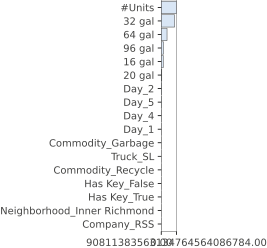

In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train, y_train)
I = importances(lm, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
#Units,9.081138e+25
32 gal,7.985001e+25
64 gal,3.456433e+25
96 gal,1.408177e+25
16 gal,1.192149e+25
20 gal,3.200401e+24
Day_2,1.375273e+24
Day_5,1.037942e+24
Day_4,5.838425e+23


In [ ]:
y_pred = pipe.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*lm.score(X_validation, y_validation):.0f}%")

mean squared error: 13,920.07, Accuracy 17%


In [ ]:
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              ElasticNet(), 
              HuberRegressor(), 
              SGDRegressor()]

for algo in algorithms:
    pipe2 = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe2.fit(X_train, y_train)
    y_pred = pipe2.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}")

LinearRegression  - mean squared error: 2,609.31
Lasso             - mean squared error: 2,628.65
Ridge             - mean squared error: 2,608.59
ElasticNet        - mean squared error: 2,865.79
HuberRegressor    - mean squared error: 2,685.73
SGDRegressor      - mean squared error: 2,633.32


# Try tuning hyperparameters for Ridge Regression Model 

In [ ]:
pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rr', Ridge())]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.60, Accuracy 58%


In [ ]:
pipe_ridge['rr'].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
hyperparameters = {'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rr', Ridge(**hyperparameters))]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.59, Accuracy 58%


In [ ]:
# Try Ridge CV 

pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rrcv', RidgeCV())]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.65, Accuracy 58%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>